In [16]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
%matplotlib inline
# Imports for better visualization
from matplotlib import rcParams
#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (12, 8)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'

In [2]:
public_test = pd.read_csv('private_test_x.csv')

In [31]:
public_test

,Usage,Timestep,InventoryCode,Domain
0,78,1,0,B
1,78,2,0,B
2,78,3,0,B
3,78,4,0,B
4,78,5,0,B
5,78,6,0,B
6,78,7,0,B
7,78,8,0,B
8,78,9,0,B
9,78,10,0,B


In [3]:
public_testB = public_test[public_test['Domain']=='B']
public_testCii = public_test[public_test['Domain']=='C[ii]']
public_testCi = public_test[public_test['Domain']=='C[i]']
public_testA = public_test[public_test['Domain']=='A']

In [4]:
public_test_submission = pd.read_csv('private_test_y.csv')

In [5]:
public_test_submissionB = public_test_submission[public_test_submission['Domain']=='B']
public_test_submissionCii = public_test_submission[public_test_submission['Domain']=='C[ii]']
public_test_submissionCi = public_test_submission[public_test_submission['Domain']=='C[i]']
public_test_submissionA = public_test_submission[public_test_submission['Domain']=='A']

In [6]:
submission = []

In [32]:
public_testB = public_testB.sort_values('Timestep')
dtrain = xgb.DMatrix(public_testB.iloc[:,1:3],label=public_testB.iloc[:,0])
watchlist = [(dtrain, 'train')]
params ={'eta':0.1,'seed':0,'subsample':1.0,'colsample_bytree':1.0,'objective':'reg:linear','max_depth':5,'min_child_weight':1}
r1 = xgb.train(params, dtrain, 1500, watchlist, maximize=False, verbose_eval=20, early_stopping_rounds=200)
public_test_submissionB['Timestep'] = public_test_submissionB['Timestep'] + 75
dtest = xgb.DMatrix(data=public_test_submissionB.iloc[:,1:3])
b=r1.predict(dtest)
for e in b:
    submission.append(e)

[0]	train-rmse:47.3645
Will train until train-rmse hasn't improved in 200 rounds.
[20]	train-rmse:16.8814
[40]	train-rmse:11.7203
[60]	train-rmse:9.75254
[80]	train-rmse:8.93881
[100]	train-rmse:8.48721
[120]	train-rmse:8.17179
[140]	train-rmse:7.96149
[160]	train-rmse:7.75032
[180]	train-rmse:7.48936
[200]	train-rmse:7.18047
[220]	train-rmse:7.00932
[240]	train-rmse:6.84882
[260]	train-rmse:6.62634
[280]	train-rmse:6.41483
[300]	train-rmse:6.24081
[320]	train-rmse:6.00514
[340]	train-rmse:5.75719
[360]	train-rmse:5.61885
[380]	train-rmse:5.47121
[400]	train-rmse:5.36628
[420]	train-rmse:5.21101
[440]	train-rmse:5.0253
[460]	train-rmse:4.96844
[480]	train-rmse:4.85418
[500]	train-rmse:4.78341
[520]	train-rmse:4.67849
[540]	train-rmse:4.5112
[560]	train-rmse:4.39767
[580]	train-rmse:4.2507
[600]	train-rmse:4.13051
[620]	train-rmse:4.03331
[640]	train-rmse:3.94487
[660]	train-rmse:3.85015
[680]	train-rmse:3.79337
[700]	train-rmse:3.67913
[720]	train-rmse:3.54553
[740]	train-rmse:3.47395


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


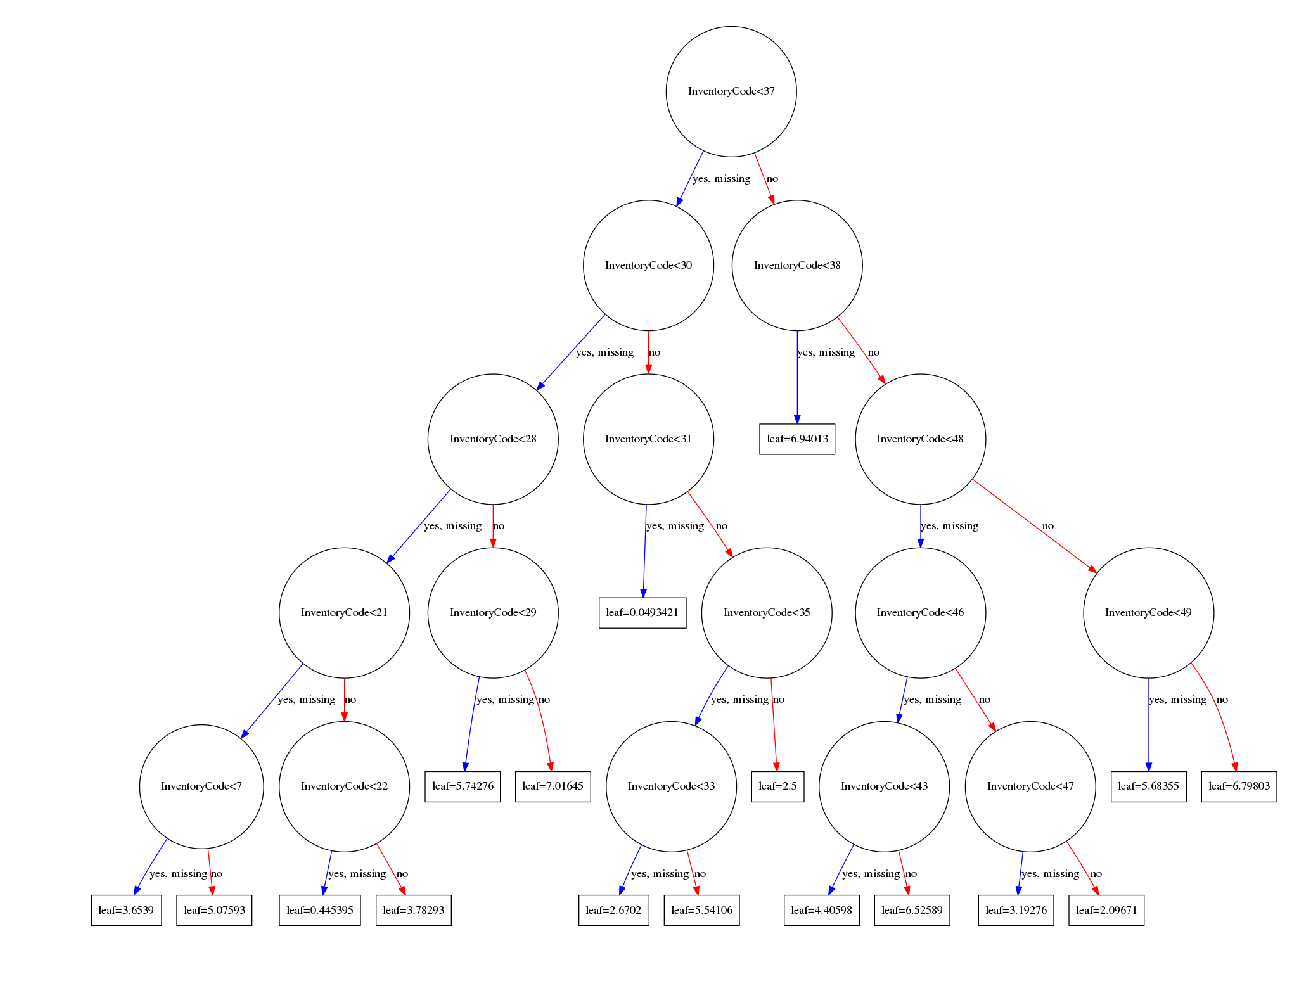

In [33]:
from xgboost import plot_tree
plot_tree(r1)

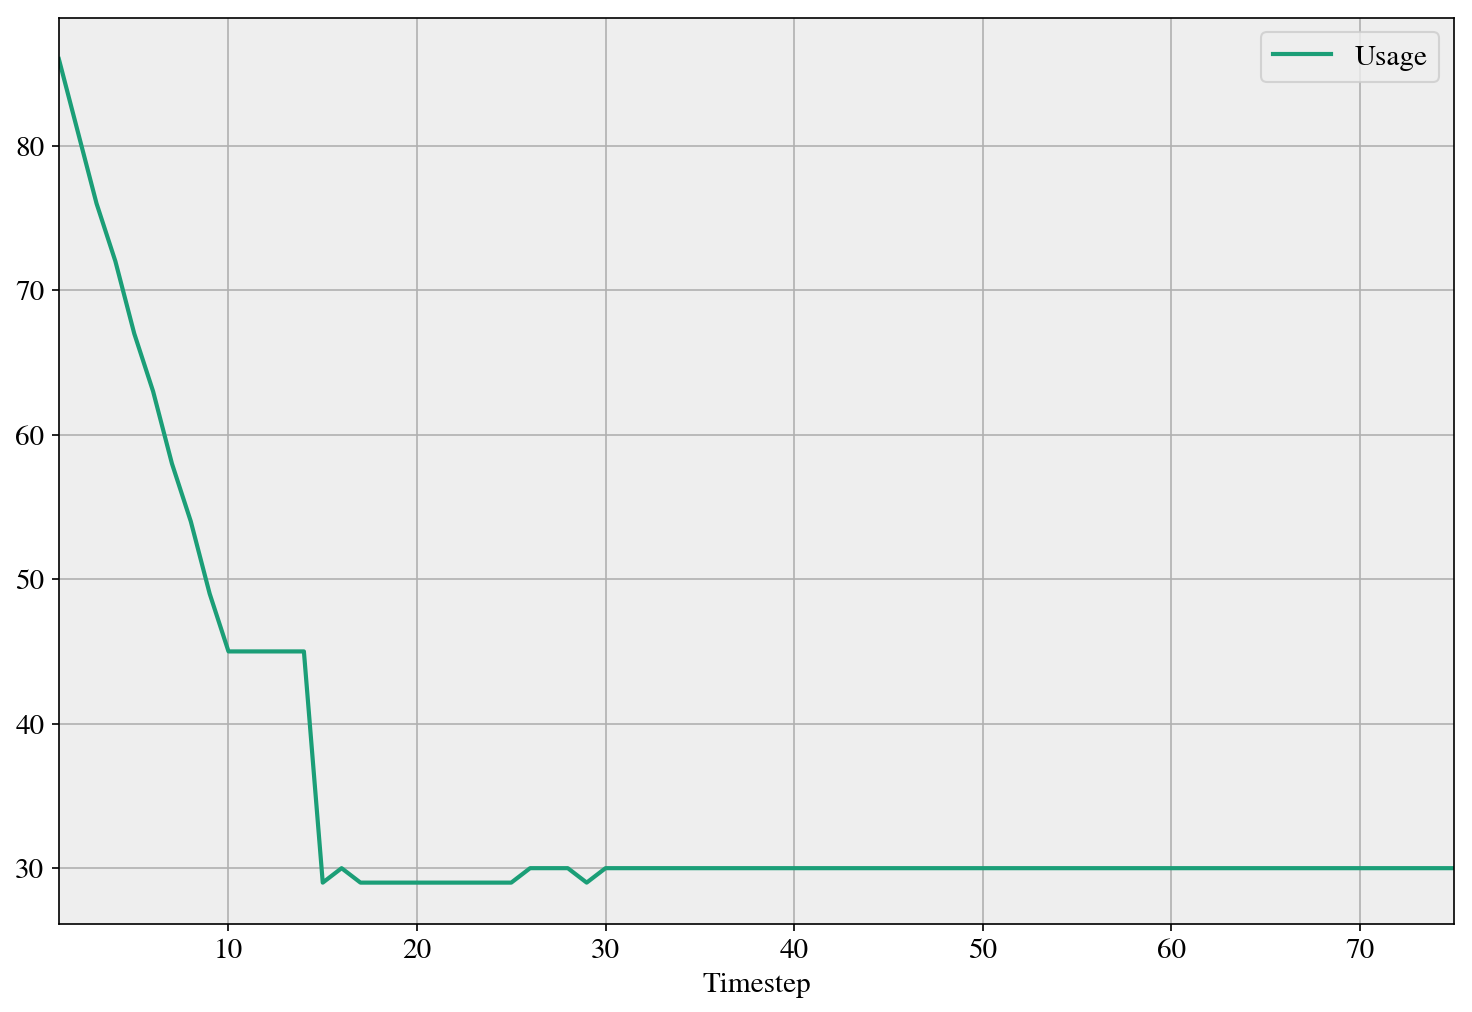

In [29]:
public_testB0 = public_testB[public_testB['InventoryCode']==4]
public_testB0.plot(x='Timestep',y='Usage')

In [30]:
public_testB

,Usage,Timestep,InventoryCode,Domain
0,78,1,0,B
675,89,1,9,B
2550,42,1,34,B
2625,20,1,35,B
525,69,1,7,B
2700,39,1,36,B
2775,74,1,37,B
450,8,1,6,B
2925,43,1,39,B
375,1,1,5,B


In [75]:
public_testCii = public_testCii.sort_values('Timestep')
dtrain = xgb.DMatrix(public_testCii.iloc[:,1:3],label=public_testCii.iloc[:,0])
watchlist = [(dtrain, 'train')]
params ={'eta':0.1,'seed':0,'subsample':1.0,'colsample_bytree':1.0,'objective':'reg:linear','max_depth':9,'min_child_weight':1}
r1 = xgb.train(params, dtrain, 1500, watchlist, maximize=False, verbose_eval=20, early_stopping_rounds=200)
public_test_submissionCii['Timestep'] = public_test_submissionCii['Timestep'] + 35
dtest = xgb.DMatrix(data=public_test_submissionCii.iloc[:,1:3])
cii=r1.predict(dtest)
for e in cii:
    submission.append(e)

[0]	train-rmse:5.5361e+09
Will train until train-rmse hasn't improved in 200 rounds.
[20]	train-rmse:7.75232e+08
[40]	train-rmse:1.7867e+08
[60]	train-rmse:8.21536e+07
[80]	train-rmse:5.77377e+07
[100]	train-rmse:4.69103e+07
[120]	train-rmse:3.62088e+07
[140]	train-rmse:2.85980e+07
[160]	train-rmse:2.16927e+07
[180]	train-rmse:1.65241e+07
[200]	train-rmse:1.13367e+07
[220]	train-rmse:9.15422e+06
[240]	train-rmse:8.04506e+06
[260]	train-rmse:6.36866e+06
[280]	train-rmse:4.7358e+06
[300]	train-rmse:3.4174e+06
[320]	train-rmse:2.62924e+06
[340]	train-rmse:2.16868e+06
[360]	train-rmse:1.78246e+06
[380]	train-rmse:1.46804e+06
[400]	train-rmse:1.13462e+06
[420]	train-rmse:936000
[440]	train-rmse:696008
[460]	train-rmse:586863
[480]	train-rmse:445343
[500]	train-rmse:352619
[520]	train-rmse:308334
[540]	train-rmse:251171
[560]	train-rmse:199728
[580]	train-rmse:169421
[600]	train-rmse:145857
[620]	train-rmse:117996
[640]	train-rmse:101096
[660]	train-rmse:81999.7
[680]	train-rmse:65116.1
[700

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [76]:
public_testCi = public_testCi.sort_values('Timestep')
dtrain = xgb.DMatrix(public_testCi.iloc[:,1:3],label=public_testCi.iloc[:,0])
watchlist = [(dtrain, 'train')]
params ={'eta':0.1,'seed':0,'subsample':1.0,'colsample_bytree':1.0,'objective':'reg:linear','max_depth':9,'min_child_weight':1}
r1 = xgb.train(params, dtrain, 1500, watchlist, maximize=False, verbose_eval=20, early_stopping_rounds=200)
public_test_submissionCi['Timestep'] = public_test_submissionCi['Timestep'] + 35
dtest = xgb.DMatrix(data=public_test_submissionCi.iloc[:,1:3])
ci=r1.predict(dtest)
for e in ci:
    submission.append(e)

[0]	train-rmse:7.67513e+09
Will train until train-rmse hasn't improved in 200 rounds.
[20]	train-rmse:1.05347e+09
[40]	train-rmse:1.98921e+08
[60]	train-rmse:7.98196e+07
[80]	train-rmse:5.21554e+07
[100]	train-rmse:3.55428e+07
[120]	train-rmse:2.41101e+07
[140]	train-rmse:1.94248e+07
[160]	train-rmse:1.44412e+07
[180]	train-rmse:1.17958e+07
[200]	train-rmse:9.27436e+06
[220]	train-rmse:7.3703e+06
[240]	train-rmse:5.3934e+06
[260]	train-rmse:4.12069e+06
[280]	train-rmse:3.08176e+06
[300]	train-rmse:2.40469e+06
[320]	train-rmse:1.87989e+06
[340]	train-rmse:1.62485e+06
[360]	train-rmse:1.36497e+06
[380]	train-rmse:1.04534e+06
[400]	train-rmse:838052
[420]	train-rmse:657523
[440]	train-rmse:492150
[460]	train-rmse:378622
[480]	train-rmse:314516
[500]	train-rmse:262279
[520]	train-rmse:219265
[540]	train-rmse:181257
[560]	train-rmse:152969
[580]	train-rmse:131571
[600]	train-rmse:114209
[620]	train-rmse:105113
[640]	train-rmse:87861.5
[660]	train-rmse:73742.2
[680]	train-rmse:66647.9
[700]	

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [77]:
public_testA = public_testA.sort_values('Timestep')
dtrain = xgb.DMatrix(public_testA.iloc[:,1:3],label=public_testA.iloc[:,0])
watchlist = [(dtrain, 'train')]
params ={'eta':0.1,'seed':0,'subsample':1.0,'colsample_bytree':1.0,'objective':'reg:linear','max_depth':9,'min_child_weight':1}
r1 = xgb.train(params, dtrain, 1500, watchlist, maximize=False, verbose_eval=20, early_stopping_rounds=200)
public_test_submissionA['Timestep'] = public_test_submissionA['Timestep'] + 100
dtest = xgb.DMatrix(data=public_test_submissionA.iloc[:,1:3])
a=r1.predict(dtest)
for e in a:
    submission.append(e)

[0]	train-rmse:29.4626
Will train until train-rmse hasn't improved in 200 rounds.
[20]	train-rmse:8.44223
[40]	train-rmse:3.95789
[60]	train-rmse:2.96157
[80]	train-rmse:2.62652
[100]	train-rmse:2.29776
[120]	train-rmse:2.0375
[140]	train-rmse:1.75418
[160]	train-rmse:1.58678
[180]	train-rmse:1.41107
[200]	train-rmse:1.25001
[220]	train-rmse:1.12665
[240]	train-rmse:1.02423
[260]	train-rmse:0.933471
[280]	train-rmse:0.843173
[300]	train-rmse:0.761905
[320]	train-rmse:0.699776
[340]	train-rmse:0.650842
[360]	train-rmse:0.614208
[380]	train-rmse:0.568753
[400]	train-rmse:0.525061
[420]	train-rmse:0.486586
[440]	train-rmse:0.452767
[460]	train-rmse:0.425258
[480]	train-rmse:0.398022
[500]	train-rmse:0.370773
[520]	train-rmse:0.349588
[540]	train-rmse:0.323172
[560]	train-rmse:0.304972
[580]	train-rmse:0.284032
[600]	train-rmse:0.265869
[620]	train-rmse:0.244732
[640]	train-rmse:0.228493
[660]	train-rmse:0.215734
[680]	train-rmse:0.20548
[700]	train-rmse:0.196609
[720]	train-rmse:0.185111


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [78]:
public_test_submission['Usage'] = submission
public_test_submission.to_csv('sub3_xgb.csv', index=False)